In [2]:
import pandas as pd
import numpy as np
import random
import scipy.stats
import math
import seaborn as sns
from matplotlib import pyplot as plt
from random import sample
from scipy.stats import chisquare
from scipy.stats import geom
from scipy.stats import t
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

In [8]:
'''Compute the 95% confidence interval for the family income coecient using the regression output
from Table 8.21.'''

b0 = 24319.3
s_b0 = 1291.5
t_b0 = 18.83

b1 = -0.0431
s_b1 = .0108
t_b1 = -3.98

xbar = b1
se = s_b1
dof = 48
cl = .95
sl = 1-cl


CONFIDENCE INTERVAL
a) standard error = 0.0108, me = 0.0217, dof = 48, t_conf = 2.0106
b) we're 95% confident that the with each dollar increase in family_income, the university's gift aid is predicted to 
decrease on average by -0.0648 and -0.0214



C:\Program Files (x86)\Anaconda3\lib\site-packages\matplotlib\patches.py:121: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


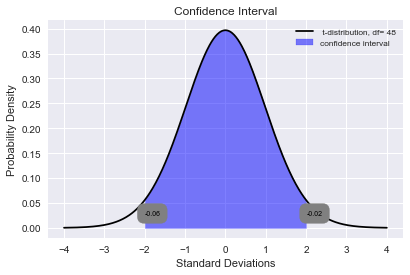

In [13]:
# CONFIDENCE INTERVAL
fig = plt.figure(figsize=(14,4))
x = np.linspace(-4, 4, 500)
s1t = sl / 2
t_conf = stats.t.ppf(1-s1t, dof) # upper tail is 1 - confidence level /2 (one tail)
se = s_b1
me = t_conf * se
lo = xbar - me
hi = xbar + me
print('''CONFIDENCE INTERVAL
a) standard error = {se:.4f}, me = {me:.4f}, dof = {dof}, t_conf = {t_conf:.4f}
b) we're {cl:.0%} confident that the with each dollar increase in family_income, the university's gift aid is predicted to 
decrease on average by {lo:.4f} and {hi:.4f}
'''
.format(cl=cl,se=se,me=me,lo=lo,hi=hi,dof=dof,t_conf=t_conf))

ax_conf = fig.add_subplot(1,2,2)
y = stats.t.pdf(x, dof)
two_t_conf = [t_conf, (t_conf)*-1]

ax_conf.plot(x, y, color='black',label=f' t-distribution, df= {dof}'.format(df=dof))
ax_conf.fill_between(x, y, color='blue', alpha=0.5, where= ~((x<min(two_t_conf)) | (x>max(two_t_conf))) ,label="confidence interval")
ax_conf.set_ylabel('Probability Density')
ax_conf.set_xlabel('Standard Deviations')
ax_conf.set_title('Confidence Interval')
ax_conf.text(min(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_lo:.2f}'.format(t_lo=lo), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
ax_conf.text(max(two_t_conf), stats.t.cdf(x=min(two_t_conf), df=dof), '{t_hi:.2f}'.format(t_hi=hi), color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1', color='gray'),fontsize='x-small')
legend = ax_conf.legend(shadow=True,fontsize='small')

In [14]:
'''8.31 Body measurements, Part IV. The scatterplot and least squares summary below show the relation-
ship between weight measured in kilograms and height measured in centimeters of 507 physically active
individuals.
Height (cm)
Weight (kg)
150 175 200
50
70
90
110
Estimate Std. Error t value Pr(>jtj)
(Intercept) -105.0113 7.5394 -13.93 0.0000
height 1.0176 0.0440 23.13 0.0000
(a) Describe the relationship between height and weight.
(b) Write the equation of the regression line. Interpret the slope and intercept in context.
(c) Do the data provide strong evidence that an increase in height is associated with an increase in weight?
State the null and alternative hypotheses, report the p-value, and state your conclusion.
(d) The correlation coecient for height and weight is 0.72. Calculate R2 and interpret it in context.'''

'8.31 Body measurements, Part IV. The scatterplot and least squares summary below show the relation-\nship between weight measured in kilograms and height measured in centimeters of 507 physically active\nindividuals.\nHeight (cm)\nWeight (kg)\n150 175 200\n50\n70\n90\n110\nEstimate Std. Error t value Pr(>jtj)\n(Intercept) -105.0113 7.5394 -13.93 0.0000\nheight 1.0176 0.0440 23.13 0.0000\n(a) Describe the relationship between height and weight.\n(b) Write the equation of the regression line. Interpret the slope and intercept in context.\n(c) Do the data provide strong evidence that an increase in height is associated with an increase in weight?\nState the null and alternative hypotheses, report the p-value, and state your conclusion.\n(d) The correlation coe\x0ecient for height and weight is 0.72. Calculate R2 and interpret it in context.'

In [15]:
'''8.32 Beer and blood alcohol content. Many people believe that gender, weight, drinking habits, and many
other factors are much more important in predicting blood alcohol content (BAC) than simply considering
the number of drinks a person consumed. Here we examine data from sixteen student volunteers at Ohio
State University who each drank a randomly assigned number of cans of beer. These students were evenly
divided between men and women, and they diered in weight and drinking habits. Thirty minutes later, a
police ocer measured their blood alcohol content (BAC) in grams of alcohol per deciliter of blood.19 The
scatterplot and regression table summarize the ndings.
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
l
2 4 6 8
0.05 0.10 0.15
Cans of beer
BAC (grams / deciliter)
Estimate Std. Error t value Pr(>jtj)
(Intercept) -0.0127 0.0126 -1.00 0.3320
beers 0.0180 0.0024 7.48 0.0000
(a) Describe the relationship between the number of cans of beer and BAC.
(b) Write the equation of the regression line. Interpret the slope and intercept in context.
(c) Do the data provide strong evidence that drinking more cans of beer is associated with an increase in
blood alcohol? State the null and alternative hypotheses, report the p-value, and state your conclusion.
(d) The correlation coecient for number of cans of beer and BAC is 0.89. Calculate R2 and interpret it in
context.
(e) Suppose we visit a bar, ask people how many drinks they have had, and also take their BAC. Do you
think the relationship between number of drinks and BAC would be as strong as the relationship found
in the Ohio State study?'''

'8.32 Beer and blood alcohol content. Many people believe that gender, weight, drinking habits, and many\nother factors are much more important in predicting blood alcohol content (BAC) than simply considering\nthe number of drinks a person consumed. Here we examine data from sixteen student volunteers at Ohio\nState University who each drank a randomly assigned number of cans of beer. These students were evenly\ndivided between men and women, and they di\nered in weight and drinking habits. Thirty minutes later, a\npolice o\x0ecer measured their blood alcohol content (BAC) in grams of alcohol per deciliter of blood.19 The\nscatterplot and regression table summarize the \nndings.\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\nl\n2 4 6 8\n0.05 0.10 0.15\nCans of beer\nBAC (grams / deciliter)\nEstimate Std. Error t value Pr(>jtj)\n(Intercept) -0.0127 0.0126 -1.00 0.3320\nbeers 0.0180 0.0024 7.48 0.0000\n(a) Describe the relationship between the number of cans of beer and BAC.\n(b) Write t

In [16]:
'''8.33 Husbands and wives, Part II. The scatterplot below summarizes husbands' and wives' heights in a
random sample of 170 married couples in Britain, where both partners' ages are below 65 years. Summary
output of the least squares t for predicting wife's height from husband's height is also provided in the table.
Husband's height (in inches)
Wife's height (in inches)
60 65 70 75
55
60
65
70
Estimate Std. Error t value Pr(>jtj)
(Intercept) 43.5755 4.6842 9.30 0.0000
height husband 0.2863 0.0686 4.17 0.0000
(a) Is there strong evidence that taller men marry taller women? State the hypotheses and include any
information used to conduct the test.
(b) Write the equation of the regression line for predicting wife's height from husband's height.
(c) Interpret the slope and intercept in the context of the application.
(d) Given that R2 = 0:09, what is the correlation of heights in this data set?
(e) You meet a married man from Britain who is 5'9" (69 inches). What would you predict his wife's height
to be? How reliable is this prediction?
(f) You meet another married man from Britain who is 6'7" (79 inches). Would it be wise to use the same
linear model to predict his wife's height? Why or why not?'''

'8.33 Husbands and wives, Part II. The scatterplot below summarizes husbands\' and wives\' heights in a\nrandom sample of 170 married couples in Britain, where both partners\' ages are below 65 years. Summary\noutput of the least squares \nt for predicting wife\'s height from husband\'s height is also provided in the table.\nHusband\'s height (in inches)\nWife\'s height (in inches)\n60 65 70 75\n55\n60\n65\n70\nEstimate Std. Error t value Pr(>jtj)\n(Intercept) 43.5755 4.6842 9.30 0.0000\nheight husband 0.2863 0.0686 4.17 0.0000\n(a) Is there strong evidence that taller men marry taller women? State the hypotheses and include any\ninformation used to conduct the test.\n(b) Write the equation of the regression line for predicting wife\'s height from husband\'s height.\n(c) Interpret the slope and intercept in the context of the application.\n(d) Given that R2 = 0:09, what is the correlation of heights in this data set?\n(e) You meet a married man from Britain who is 5\'9" (69 inches). Wh

In [17]:
'''8.34 Urban homeowners, Part II. Exercise 8.29 gives a scatterplot displaying the relationship between the
percent of families that own their home and the percent of the population living in urban areas. Below is a
similar scatterplot, excluding District of Columbia, as well as the residuals plot. There were 51 cases.
(a) For these data, R2 = 0:28. What is the
correlation? How can you tell if it is
positive or negative?
(b) Examine the residual plot. What do you
observe? Is a simple least squares t
appropriate for these data?'''

'8.34 Urban homeowners, Part II. Exercise 8.29 gives a scatterplot displaying the relationship between the\npercent of families that own their home and the percent of the population living in urban areas. Below is a\nsimilar scatterplot, excluding District of Columbia, as well as the residuals plot. There were 51 cases.\n(a) For these data, R2 = 0:28. What is the\ncorrelation? How can you tell if it is\npositive or negative?\n(b) Examine the residual plot. What do you\nobserve? Is a simple least squares \nt\nappropriate for these data?'

In [18]:
'''8.35 Murders and poverty, Part II. Exercise 8.25 presents regression output from a model for predicting
annual murders per million from percentage living in poverty based on a random sample of 20 metropolitan
areas. The model output is also provided below.
Estimate Std. Error t value Pr(>jtj)
(Intercept) -29.901 7.789 -3.839 0.001
poverty% 2.559 0.390 6.562 0.000
s = 5:512 R2 = 70:52% R2
adj = 68:89%
(a) What are the hypotheses for evaluating whether poverty percentage is a signicant predictor of murder
rate?
(b) State the conclusion of the hypothesis test from part (a) in context of the data.
(c) Calculate a 95% condence interval for the slope of poverty percentage, and interpret it in context of
the data.
(d) Do your results from the hypothesis test and the condence interval agree? Explain.'''

'8.35 Murders and poverty, Part II. Exercise 8.25 presents regression output from a model for predicting\nannual murders per million from percentage living in poverty based on a random sample of 20 metropolitan\nareas. The model output is also provided below.\nEstimate Std. Error t value Pr(>jtj)\n(Intercept) -29.901 7.789 -3.839 0.001\npoverty% 2.559 0.390 6.562 0.000\ns = 5:512 R2 = 70:52% R2\nadj = 68:89%\n(a) What are the hypotheses for evaluating whether poverty percentage is a signi\ncant predictor of murder\nrate?\n(b) State the conclusion of the hypothesis test from part (a) in context of the data.\n(c) Calculate a 95% con\ndence interval for the slope of poverty percentage, and interpret it in context of\nthe data.\n(d) Do your results from the hypothesis test and the con\ndence interval agree? Explain.'

In [19]:
'''8.36 Babies. Is the gestational age (time between conception and birth) of a low birth-weight baby useful
in predicting head circumference at birth? Twenty-ve low birth-weight babies were studied at a Harvard
teaching hospital; the investigators calculated the regression of head circumference (measured in centimeters)
against gestational age (measured in weeks). The estimated regression line is
head circdumference = 3:91 + 0:78  gestational age
(a) What is the predicted head circumference for a baby whose gestational age is 28 weeks?
(b) The standard error for the coecient of gestational age is 0. 35, which is associated with df = 23. Does
the model provide strong evidence that gestational age is signicantly associated with head circumfer-
ence?'''

'8.36 Babies. Is the gestational age (time between conception and birth) of a low birth-weight baby useful\nin predicting head circumference at birth? Twenty-\nve low birth-weight babies were studied at a Harvard\nteaching hospital; the investigators calculated the regression of head circumference (measured in centimeters)\nagainst gestational age (measured in weeks). The estimated regression line is\nhead circdumference = 3:91 + 0:78 \x02 gestational age\n(a) What is the predicted head circumference for a baby whose gestational age is 28 weeks?\n(b) The standard error for the coe\x0ecient of gestational age is 0. 35, which is associated with df = 23. Does\nthe model provide strong evidence that gestational age is signi\ncantly associated with head circumfer-\nence?'